In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 # Consider a game where you can pay to access an unusual lottery. 

Tickets are picked from a normal distribution of possible values, with mean $50 and standard deviation $50. If your ticket's value is below $1, you receive a pity prize of $1. If your ticket's value is above $100, you receive the dollar amount on your ticket, plus a bonus of $20. Otherwise, you receive the dollar amount on your ticket.

What is the expected value of a ticket to this lottery? Show your work by providing math, code, or a source for your thinking.

You now have the opportunity to receive two tickets from that lottery (an "entry"), and can redeem only the higher value ticket as the prize for your entry.

What is the new expected value of an entry to this lottery? Show your work by providing math, code, or a source for your thinking.


# Initial Thinking

## Math Theory Method

I could see multiple ways of solving this problem. For one, we could mathematically find the expected value of this lottery by writing out the distribution's formula and then integrating this to get the expected value. 

I did this using StackOverFlow and ChatGPT to refresh my memory on the exact maths, but essentially we have a piecewise normal distribution, where for x < 1, we output 1, where X is the randomly picked number from the normal distribution. For x between 1 and 100, we just get the output of norm(x). For x > 100, we get norm(x) + 20. This gives us three different parts to integrate, which when we integrate it, we get about $57.50.

## Monte Carlo Method

One of my favorite techniques is Monte Carlo Simulation. It has so many applications, and I've used it to simulate when LeBron James would break the NBA scoring record and simulate how my fantasy baseball leaguemate's would draft using random numbers as inputs into a predictive model I made. 

It could also be applicable here. We can create a function that pulls a random number and then assign it a dollar value based on the rules of the lotto. Then do this lotto many times. Take the average of this sample of lotto's and it will give us the average lotto earnings per ticket from that sample. 

Then, we can do many of these samples, saving the average after every iteration. The Central Limit Theorem tells us that with a sufficiently large number of these samples sizes, the sample mean will approach a normal distribution where the mean is the true expected value of the lotto. 

I do this process step-by-step below.


In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a single pull from the lottery
def pull_lotto():
    # Generate n random numbers from the normal distribution with mean 50, stdev 50.
    raw_pull = np.random.normal(loc=50, scale=50, size=1)
    # Clean the pulls per the lotto rules
    if raw_pull > 100:
        cleaned_pull = (raw_pull + 20)[0]
    elif 1 < raw_pull <= 100:
        cleaned_pull = raw_pull[0]
    else:
        cleaned_pull = 1
    return cleaned_pull

# Function to simulate n lottery pulls and optionally plot the results
def run_lotto(n=1000, plot=True):
    total_pulls = [pull_lotto() for _ in range(n)]
    n_bins = 10
    ev = np.mean(total_pulls)
    if plot:
        fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
        # Plot histogram of lottery pulls
        plt.hist(total_pulls, bins=n_bins, edgecolor="black")
        plt.axvline(x=ev, linestyle='--', color='red')
        plt.figtext(x=0.35, y=0.85, s=f"The expected value of the lottery is ${ev:.2f} dollars.")
        plt.show()
    else:
        return ev

# Function to perform Monte Carlo simulation using CLT
def monte_carlo_lotto(num_simulations=1000, sample_size=100, plot=True):
    # Run multiple simulations and compute the mean of sample means
    sample_means = [np.mean([pull_lotto() for _ in range(sample_size)]) for _ in range(num_simulations)]
    mc_ev = np.mean(sample_means)  # Monte Carlo expected value
    mc_std = np.std(sample_means)  # Monte Carlo standard deviation
    
    if plot:
        # Plot histogram of sample means
        fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
        plt.hist(sample_means, bins=20, edgecolor="black", alpha=0.7)
        plt.axvline(x=mc_ev, linestyle='--', color='red', label=f"Mean: ${mc_ev:.2f}")
        plt.axvline(x=mc_ev + mc_std, linestyle='--', color='blue', label=f"+1 Std Dev: ${mc_ev + mc_std:.2f}")
        plt.axvline(x=mc_ev - mc_std, linestyle='--', color='blue', label=f"-1 Std Dev: ${mc_ev - mc_std:.2f}")
        plt.legend()
        plt.title(f"Monte Carlo Simulation of Sample Means\nn={sample_size}, simulations={num_simulations}")
        plt.xlabel("Sample Mean Value")
        plt.ylabel("Frequency")
        plt.show()
    else:
        return mc_ev, mc_std


## Run one iteration of the model

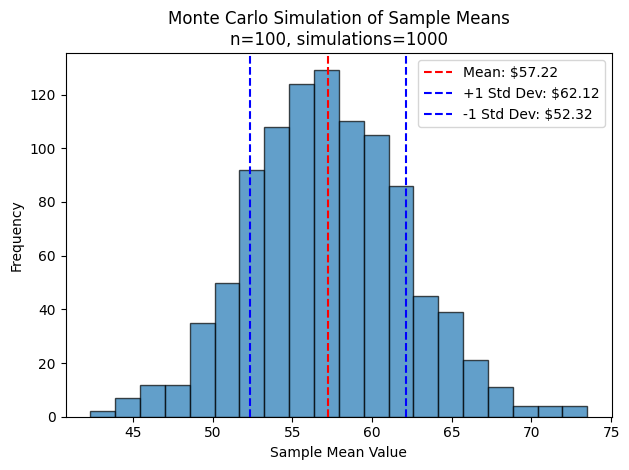

In [140]:

# Example usage:
# Run a simple simulation
monte_carlo_lotto(num_simulations=1000, sample_size=100)

The mean of $57.22 is very close to the theoretical mean of around $57.50! I love Monte Carlo simulation.

# The extra-special lotto

Get two tries, only keep the highest!

Using the mathematical integration method, we can find the expected value of the maximum of two indepent and identically distributed (IID) random variables. This process involves integrating from negative infinity to infinity (the bounds of the normal distribution) and includes utilizing the probability distribution function and cumulative distribution functions of the normal distribution. A hybrid approach can simplify this integral and then calculate the integral of the PDF/CDF using Python or R.

All in all, we find the theoretical E[max(X_1, X_2)] to be about $78.40 dollars. X_1 and X_2 indicate IID random variables of the two-pull lottery system.

## But, Monte Carlo is more fun.

We can use the process we did in step 1 to integrate the new rules and then simulate this many many times to find the expected value this way.

In [148]:
# Function to simulate the higher of two lotto pulls
def pull_extra_special_lotto(n=1000, plot=True):
    cleaned_pulls = []
    for _ in range(n):
        # Pull the lotto twice and take the maximum value
        cleaned_pulls.append(np.max([pull_lotto(), pull_lotto()]))
    ev = np.mean(cleaned_pulls)
    
    if plot:
        # Plot the histogram of the results
        fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
        plt.hist(cleaned_pulls, bins=10, edgecolor="black")
        plt.axvline(x=ev, linestyle='--', color='red')
        plt.figtext(x=0.35, y=0.85, s=f"The expected value of the lottery is ${ev:.2f} dollars.")
        plt.show()
    else:
        return ev

# Function to perform multiple simulations for CLT
def clt_extra_special_lotto(num_simulations=1000, sample_size=100, plot=True):
    # Run multiple simulations of the extra special lotto
    sample_means = [
        np.mean([np.max([pull_lotto(), pull_lotto()]) for _ in range(sample_size)])
        for _ in range(num_simulations)
    ]
    
    mc_ev = np.mean(sample_means)  # Monte Carlo expected value
    mc_std = np.std(sample_means)  # Monte Carlo standard deviation
    
    if plot:
        # Plot histogram of the sample means
        fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
        plt.hist(sample_means, bins=20, edgecolor="black", alpha=0.7)
        plt.axvline(x=mc_ev, linestyle='--', color='red', label=f"Mean: ${mc_ev:.2f}")
        plt.axvline(x=mc_ev + mc_std, linestyle='--', color='blue', label=f"+1 Std Dev: ${mc_ev + mc_std:.2f}")
        plt.axvline(x=mc_ev - mc_std, linestyle='--', color='blue', label=f"-1 Std Dev: ${mc_ev - mc_std:.2f}")
        plt.legend()
        plt.title(f"Monte Carlo Simulation of Sample Means\nSample Size={sample_size}, Simulations={num_simulations}")
        plt.xlabel("Sample Mean Value")
        plt.ylabel("Frequency")
        plt.show()
    else:
        return mc_ev, mc_std

# Pull the Lotto 1,000 times - Once

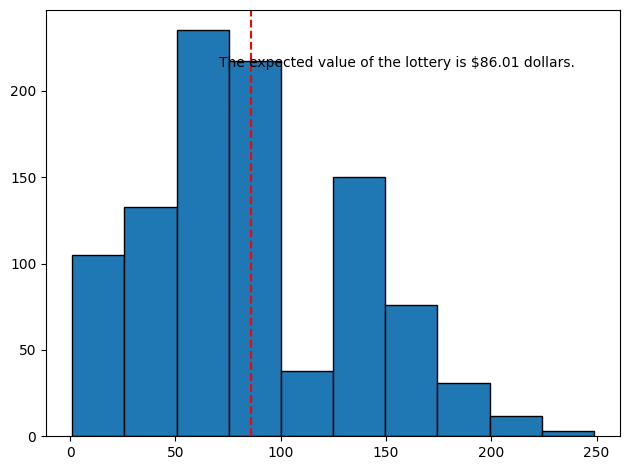

In [142]:
pull_extra_special_lotto(n=1000)

Notice there are far less one's that get pulled, which makes sense. If a one is pulled with a higher number, the one-dollar ticket will get discarded. This logically moves the average up higher as well since there are less one dollar pity prizes given out.

## Pull this lotto 100 times and do THAT many times.

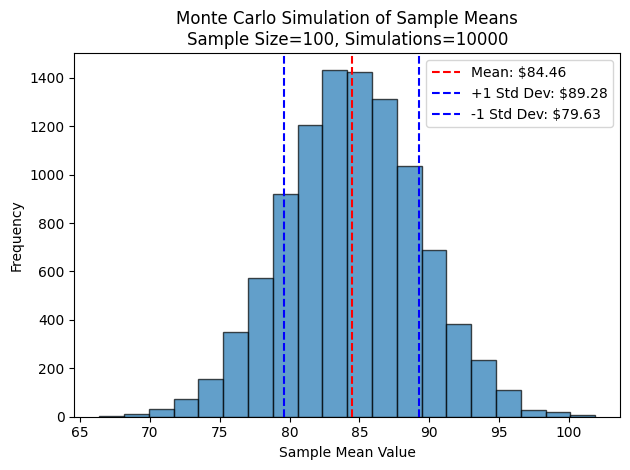

In [150]:
clt_extra_special_lotto(num_simulations=10000, sample_size=100)

As we can see, the observed expected value is about $84 when adding in this new stipulation. This is slightly different than what we calculated for the mathematical expected value which is interesting.